<a href="https://colab.research.google.com/github/Billy-freespace/Matematica-Computacional/blob/main/Final_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final exam - solution

Importing libraries

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp 

## Question 1 : Simplex method application [taken from Hannu Portillo's solution]

### item **a**

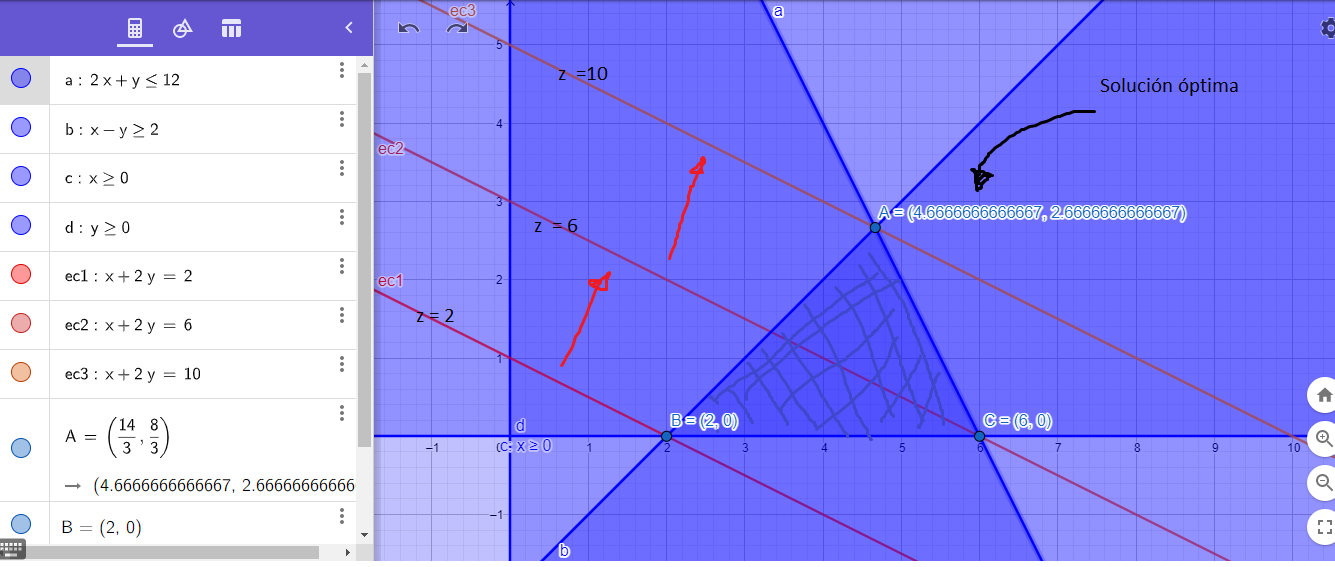

First, the feasible region is the triangle ABC. Second, the level sets of the objective function are the red lines. Third, the direction of the red arrows indicate the direction in which the objective function increases. Then, vertex $$A=\left(\frac{14}{3},\frac{8}{3}\right)$$ is the solution of the maximization problem and the optimal solution is $$ 10 = \frac{14}{3} + 2\left(\frac{8}{3}\right). $$

### item **b**

First, let us define some basic funcions:

In [ ]:
def tableau(xB, xN, c0t, ct, bt, Nt):
  T = Nt[:,:]
  T =T.row_insert(0, ct.transpose())
  T =T.row_insert(0, xN.transpose())
  bt = bt.row_insert(0, c0t)
  bt = bt.row_insert(0, sp.Matrix(['1']))
  xB = xB.row_insert(0, sp.Matrix(['z']))
  xB = xB.row_insert(0, sp.Matrix(['Simplex']))
  T = T.col_insert(0, bt)
  T = T.col_insert(0, xB)
  return T

def selectBasicVarPos(bt, Ns):
  q_min = sp.oo #Establecemos un cocienta inicial muy grande
  for i, elem in enumerate(bt):
    if Ns[i] < 0 and -elem / Ns[i] < q_min:
      q_min = -elem /  Ns[i]
      r = i
  return r

def selectNoBasicVarPos(ct):
  c_min = min(ct) #Busca el minimo de c_tilda
  for i, elem in enumerate(ct): #Busca la posicion de c_min
    if elem == c_min: #Encontrado
      s = i #Guarda la posicion
      break
  return s

def selectMinBasicValPos(bt):
  return selectNoBasicVarPos(bt)

def addNoBasicVariable(xN, ct, Nt, lenxN, lenxB, lenbt, K):
  xN = xN.row_insert(lenxN, sp.Matrix([sp.symbols('x' + str(lenxN+lenxB+1))]))
  ct = ct.row_insert(lenxN, sp.Matrix([K])) #
  Nt = Nt.col_insert(lenxN, sp.ones(lenbt, 1))
  return xN, ct, Nt

def updateNoBasicVarPos(posx1, posx2, r, s):
  if posx1[0] == r and posx1[1] == 'b':
    posx1[0] = s
    posx1[1] = 'n'
  elif posx1[0] == s and posx1[1] == 'n':
    posx1[0] = r
    posx1[1] = 'b'
  if posx2[0] == r and posx2[1] == 'b':
    posx2[0] = s
    posx2[1] = 'n'
  elif posx2[0] == s and posx2[1] == 'n':
    posx2[0] = r
    posx2[1] = 'b'
  return posx1, posx2

def pivot(xB, xN, c0t, ct, bt, Nt, r, s):
  br = bt[r]
  cs = ct[s]
  Nrs = Nt[r, s]
  Nr = Nt[r, :]
  Ns = Nt[:, s]
  xN[s], xB[r] = xB[r], xN[s]
  c0t = c0t - sp.Matrix([br*cs/Nrs])
  ct = ct - Nr.transpose() * cs / Nrs
  bt = bt - Ns * br / Nrs
  bt[r] = -br/Nrs
  ct[s] = cs/Nrs 
  for i in range(len(bt)):
      for j in range(len(ct)):
          if i != r and j != s:
              Nt[i, j] = Nt[i, j] - Ns[i]*Nr[j]/Nrs
  Nt[r, :] = -Nr/Nrs
  Nt[:, s] = Ns/Nrs
  Nt[r, s] = 1/Nrs
  return xB, xN, c0t, ct, bt, Nt, r, s

def simplex(xB, xN, c0t, ct, bt, Nt, K=1000000):
  print("### Tableau inicial ###:")
  sp.pprint(tableau(xB, xN, c0t, ct, bt, Nt))
  print()
  #posx1 = sp.Matrix([0,'n']) ##Posicion y tipo de la variable x1
  #posx2 = sp.Matrix([1,'n']) ##Posicion y tipo de la variable x1
  if min(bt) < 0: #Buscar solución inicial factible
    print("El minimo elemento de b_tilda es", min(bt), " .Como es menor que cero agregamos una nueva variable no básica")
    print("K =", K)
    
    res = addNoBasicVariable(xN, ct, Nt, len(xN), len(xB), len(bt), K) #Adicionamos la nueva variable NB en la tabla
    xN, ct, Nt = res[0], res[1], res[2]
    s = len(xN)-1 #Posición de la nueva variable no básica
    r = selectMinBasicValPos(bt) #Seleccionamos la variable básica a intercambiar

    print("Se agregó", xN[s], " como variable no básica")
    sp.pprint(tableau(xB, xN, c0t, ct, bt, Nt))
    print()
    print("Variable básica a intercambiar:", str(xB[r]))
    print("Intercambiamos la variable básica", xB[r], "y la variable no básica", xN[s])
    print()
    
    res = pivot(xB, xN, c0t, ct, bt, Nt, r, s) ########## pivotear
    xB, xN, c0t, ct, bt, Nt = res[0], res[1], res[2], res[3], res[4], res[5]

    sp.pprint(tableau(xB, xN, c0t, ct, bt, Nt))
    print()


  iter = 0
  print("Empieza proceso iterativo:")
  while min(ct) < 0 and iter < 1000: #Paso iterativo
    iter += 1
    print("Iteracion: ", iter)

    s = selectNoBasicVarPos(ct) #Seleccionamos la variable no básica a intercambiar
    r = selectBasicVarPos(bt, Nt[:, s]) #Seleccionamos la variable básica a intercambiar

    print("Variable no básica a intercambiar:", str(xN[s]))
    print("Variable básica a intercambiar:", str(xB[r]))
    print("Intercambiamos la variable básica", str(xB[r]), "y la variable no básica", xN[s])
    print()

    res = pivot(xB[:, :], xN[:, :], c0t, ct, bt, Nt[:, :], r, s) ########## pivotear
    xB, xN, c0t, ct, bt, Nt = res[0], res[1], res[2], res[3], res[4], res[5]

    sp.pprint(tableau(xB, xN, c0t, ct, bt, Nt))
    print() 

Second, transforming the original problem to its standar form; then, setting $x_1$ and $x_2$ as the non-basic variables, we calculate the parts of `the tablau':

In [ ]:
b = sp.Matrix([12, 2])
cB = sp.Matrix([0, 0])
cN = sp.Matrix([-1, -2])

B = sp.Matrix([[1, 0], [0, -1]])
N = sp.Matrix([[2, 1], [1, -1]])

bt = B.inv()*b
Nt = -B.inv()*N

c0t = cB.transpose()*bt
ct = (cB.transpose()*Nt + cN.transpose()).transpose()

x = sp.Matrix([sp.symbols('x' + str(i+1)) for i in range(len(cB) + len(cN))])

xB = sp.Matrix([x[2], x[3]])
xN = sp.Matrix([x[0], x[1]])

print("c0_tilda: ")
sp.pprint(c0t)
print()
print("c_tilda: ")
sp.pprint(ct)
print()
print("b_tilda: ")
sp.pprint(bt)
print()
print("N_tilda: ")
sp.pprint(Nt)
print()
print("Variables básicas: ")
sp.pprint(xB)
print()
print("Variables no básicas: ")
sp.pprint(xN)
print()

c0_tilda: 
[0]

c_tilda: 
⎡-1⎤
⎢  ⎥
⎣-2⎦

b_tilda: 
⎡12⎤
⎢  ⎥
⎣-2⎦

N_tilda: 
⎡-2  -1⎤
⎢      ⎥
⎣1   -1⎦

Variables básicas: 
⎡x₃⎤
⎢  ⎥
⎣x₄⎦

Variables no básicas: 
⎡x₁⎤
⎢  ⎥
⎣x₂⎦



Then, we conduct the Simplex method we have seen in class:

In [ ]:
simplex(xB, xN, c0t, ct, bt, Nt, K=2)

### Tableau inicial ###:
⎡Simplex  1   x₁  x₂⎤
⎢                   ⎥
⎢   z     0   -1  -2⎥
⎢                   ⎥
⎢  x₃     12  -2  -1⎥
⎢                   ⎥
⎣  x₄     -2  1   -1⎦

El minimo elemento de b_tilda es -2  .Como es menor que cero agregamos una nueva variable no básica
K = 2
Se agregó x5  como variable no básica
⎡Simplex  1   x₁  x₂  x₅⎤
⎢                       ⎥
⎢   z     0   -1  -2  2 ⎥
⎢                       ⎥
⎢  x₃     12  -2  -1  1 ⎥
⎢                       ⎥
⎣  x₄     -2  1   -1  1 ⎦

Variable básica a intercambiar: x4
Intercambiamos la variable básica x4 y la variable no básica x5

⎡Simplex  1   x₁  x₂  x₄⎤
⎢                       ⎥
⎢   z     4   -3  0   2 ⎥
⎢                       ⎥
⎢  x₃     14  -3  0   1 ⎥
⎢                       ⎥
⎣  x₅     2   -1  1   1 ⎦

Empieza proceso iterativo:
Iteracion:  1
Variable no básica a intercambiar: x1
Variable básica a intercambiar: x5
Intercambiamos la variable básica x5 y la variable no básica x1

⎡Simplex  1   x₅  x₂  x₄⎤
⎢    

And we conclude that the solution is the pair $$ \left(\frac{14}{3},\frac{8}{3} \right). $$

## Question 2 : Convexity

### item **a**

Let $I:=(1,\infty)$ and let $h:I\to R$ given by $$ h(x) := 1+\frac{1}{4(x-1)} $$. Then, as $$ h''(x) = \frac{1}{2{(x-1)}^3} $$ is positive on $I$ and the epigraph of $h$ is $C$, we have that $C$ is a convex set.

### item **b**

In [ ]:
x = sp.symbols('x')
y = sp.symbols('y')
var = sp.Matrix([x, y])
func = 1/x + 1/y - 1/(x*y)
print("function:")
display(Math(sp.latex(func)))
print("\n")

print("Hessian of function:")
hessian= sp.hessian(func, var)
display(Math(sp.latex(hessian)))

function:


<IPython.core.display.Math object>



Hessian of function:


<IPython.core.display.Math object>

In order to show that $f$ is convex it is enough to prove that the Hesssian above is semidefinte-positive. Then, by virtue of an analogous theorem of Sylvester's criterion (https://en.wikipedia.org/wiki/Sylvester%27s_criterion), it is equivalent to prove that the two principal minors are greater than or equal to zero. Indeed, the first minor:



In [ ]:
display(Math(sp.latex(hessian[1,1])))

<IPython.core.display.Math object>

is greater than or equal to zero since $x$ and $y$ are greater than one; moreover, the second minor:

In [ ]:
display(Math(sp.latex(hessian.det())))

<IPython.core.display.Math object>

which is equal to $$ \frac{4}{x^4\cdot y^4}\left[ (x-1)(y-1)-\frac{1}{4} \right] $$ is greater than or equal to zero as $(x,y)$ is in $C$.

## Question 3 : Finding global minima of Himmelblau function


### item **a**

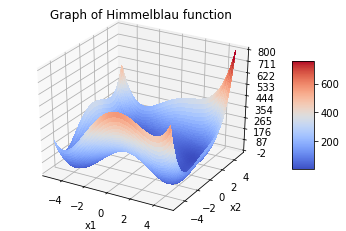

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)

Z = (X**2 + Y  -11)**2 + (X + Y**2 - 7)**2
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_zlim(-2, 800)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.f'))
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Graph of Himmelblau function')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

### item **b**

From the figure above it can be seen that the segment line between two of the global minima is not entirely in the epigraph of the function.

### item **c**

In [ ]:
def solve(f, x):
    tolerance = 1e-13
    sigma = 0.1
    beta = 0.1
    s = 1
	
    gradient = sp.Matrix([f]).jacobian((x1,x2)).T
    k = 0
    fx = evaluate(f,x)
    grad = evaluate(gradient,x)
    
    while (grad.norm() > tolerance):
        
        # direction searching
        d = -grad

        # line searching - Armijo rule
        rhs = -(sigma*s*d.T*grad)[0] # right hand side
        alpha = s
        while fx - evaluate(f, x + alpha*d) < rhs:
            alpha *= beta
            rhs *= beta

        print(f'Iteration {k}')
        print(f'x\t\t:\t{x}')
        print(f'f(x)\t\t:\t{fx}')
        print(f'direction\t:\t{d}')
        print(f'alpha\t\t:\t{alpha}\n\n')

        # Updating
        x = x + alpha*d
        k += 1
        fx = evaluate(f,x)
        grad = evaluate(gradient,x)

    print(f'x\t\t:\t{x}')
    print(f'f(x)\t\t:\t{fx}')

### item **d**

In [ ]:
x = sp.Matrix([[-4],[-4]])
solve(f,x)

Iteration 0
x		:	Matrix([[-4], [-4]])
f(x)		:	26.0000000000000
direction	:	Matrix([[6.00000000000000], [78.0000000000000]])
alpha		:	0.010000000000000002


Iteration 1
x		:	Matrix([[-3.94000000000000], [-3.22000000000000]])
f(x)		:	2.02609952000000
direction	:	Matrix([[21.6879360000000], [-9.96940800000002]])
alpha		:	0.010000000000000002


Iteration 2
x		:	Matrix([[-3.72312064000000], [-3.31969408000000]])
f(x)		:	0.298181634524399
direction	:	Matrix([[-7.41624782212868], [4.86322518617416]])
alpha		:	0.010000000000000002


Iteration 3
x		:	Matrix([[-3.79728311822129], [-3.27106182813826]])
f(x)		:	0.0314861675479566
direction	:	Matrix([[2.44738187224110], [-1.57149261378182]])
alpha		:	0.010000000000000002


Iteration 4
x		:	Matrix([[-3.77280929949888], [-3.28677675427608]])
f(x)		:	0.00368142944734628
direction	:	Matrix([[-0.855292415148736], [0.500997980057636]])
alpha		:	0.010000000000000002


Iteration 5
x		:	Matrix([[-3.78136222365036], [-3.28176677447550]])
f(x)		:	0.0004159987

In [ ]:
x = sp.Matrix([[-4],[4]])
solve(f,x)

Iteration 0
x		:	Matrix([[-4], [4]])
f(x)		:	106.000000000000
direction	:	Matrix([[134.000000000000], [-98.0000000000000]])
alpha		:	0.010000000000000002


Iteration 1
x		:	Matrix([[-2.66000000000000], [3.02000000000000]])
f(x)		:	1.10910752000001
direction	:	Matrix([[-8.54361600000002], [8.32716800000003]])
alpha		:	0.010000000000000002


Iteration 2
x		:	Matrix([[-2.74543616000000], [3.10327168000000]])
f(x)		:	0.142360137318262
direction	:	Matrix([[-3.71555333673750], [2.14787293864508]])
alpha		:	0.010000000000000002


Iteration 3
x		:	Matrix([[-2.78259169336737], [3.12475040938645]])
f(x)		:	0.0178817488996407
direction	:	Matrix([[-1.43697537052015], [0.496429776080872]])
alpha		:	0.010000000000000002


Iteration 4
x		:	Matrix([[-2.79696144707258], [3.12971470714726]])
f(x)		:	0.00223994165752080
direction	:	Matrix([[-0.525400517826901], [0.117709987512895]])
alpha		:	0.010000000000000002


Iteration 5
x		:	Matrix([[-2.80221545225085], [3.13089180702239]])
f(x)		:	0.00027885338566

In [ ]:
x = sp.Matrix([[0],[0]])
solve(f,x)

Iteration 0
x		:	Matrix([[0], [0]])
f(x)		:	170.000000000000
direction	:	Matrix([[14.0000000000000], [22.0000000000000]])
alpha		:	0.1


Iteration 1
x		:	Matrix([[1.40000000000000], [2.20000000000000]])
f(x)		:	47.3632000000000
direction	:	Matrix([[39.8240000000000], [20.3680000000000]])
alpha		:	0.010000000000000002


Iteration 2
x		:	Matrix([[1.79824000000000], [2.40368000000000]])
f(x)		:	29.0897271672632
direction	:	Matrix([[37.4215127360471], [5.18801989153587]])
alpha		:	0.010000000000000002


Iteration 3
x		:	Matrix([[2.17245512736047], [2.45556019891536]])
f(x)		:	16.0750551183337
direction	:	Matrix([[30.8330457794989], [-4.15884550803186]])
alpha		:	0.010000000000000002


Iteration 4
x		:	Matrix([[2.48078558515546], [2.41397174383504]])
f(x)		:	7.62429847512781
direction	:	Matrix([[21.5143238727196], [-7.76687400040973]])
alpha		:	0.010000000000000002


Iteration 5
x		:	Matrix([[2.69592882388266], [2.33630300383094]])
f(x)		:	3.28015140415593
direction	:	Matrix([[12.7419704579

In [ ]:
x = sp.Matrix([[4],[0]])
solve(f,x)

Iteration 0
x		:	Matrix([[4], [0]])
f(x)		:	34.0000000000000
direction	:	Matrix([[-74.0000000000000], [-10.0000000000000]])
alpha		:	0.010000000000000002


Iteration 1
x		:	Matrix([[3.26000000000000], [-0.100000000000000]])
f(x)		:	14.1360617600000
direction	:	Matrix([[13.6200960000000], [-0.547199999999998]])
alpha		:	0.010000000000000002


Iteration 2
x		:	Matrix([[3.39620096000000], [-0.105472000000000]])
f(x)		:	13.0911028530048
direction	:	Matrix([[1.36142225880539], [-2.37312426406890]])
alpha		:	0.1


Iteration 3
x		:	Matrix([[3.53234318588054], [-0.342784426406890]])
f(x)		:	12.5110051808350
direction	:	Matrix([[-9.33177867677125], [-6.86285264584840]])
alpha		:	0.010000000000000002


Iteration 4
x		:	Matrix([[3.43902539911283], [-0.411412952865374]])
f(x)		:	11.6763496527973
direction	:	Matrix([[1.06800514360486], [-6.41254574600623]])
alpha		:	0.1


Iteration 5
x		:	Matrix([[3.54582591347331], [-1.05266752746600]])
f(x)		:	5.77464423190976
direction	:	Matrix([[-2.686221115637